# Mathematical Modeling of Infectious Diseases

## Mathematical modeling
* What is mathematical modeling? ( Trying to capture the essense of a complex system via mathematical formulae )
* Oh that reminds me of the regression line through data points, is that what you are talking about? ( Yes that is a type of a mathematical model; however for infectious disease we have x-axis as time and y-axis can be the prevalence or the incidence of the disease in the population, but the relationship is far from linear). 
* Why would we want to do a mathematical modeling? (Often we cannot answer important questions that can guide descision-making on complex systems in our own, we need a tool to capture the essence and we can then formulate our question in mathematical form to get the answer we need). 

## Infectious Diseases

* What is an infectious disease? (A disease that can spread from a person to another).
* Is diabetes an infectious disease? Can you list four infectious diseases?
* How does an infectious disease spread? (contact: physical proximity, sexual intercourse, blood transfusions, needle-sharing, ..etc)
* COVID-19 is spread through physical proximity so there is the notion of physical **contact** between infected and uninfected individuals.
* If you have a population of 10 persons that are secluded in a deserted island, assuming everyone is in contact with everyone how many contacts do you estimate among those people? (a contact needs two different people, the first can be chosen from 10 and the second from 9, but because the order is immaterial = $\frac{10\times9}{2!} = 5\times9 = 45$ contacts).
* If 3 of the 10 persons have the flu, how many contacts do you estimate between those who have the flu and those who do not have it?
* Also there is the notion of **infectiousness** which is when an infected individual can infect others when they are in contact.
* Infectiousness of COVID-19 is not uniform over the course of the infections, see below:


Stankiewicz Karita HC, Dong TQ, Johnston C, et al. Trajectory of Viral RNA Load Among Persons With Incident SARS-CoV-2 G614 Infection (Wuhan Strain) in Association With COVID-19 Symptom Onset and Severity. JAMA Netw Open. 2022;5(1):e2142796. 


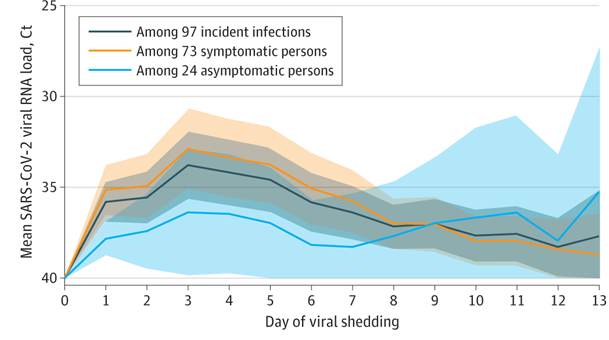

In [1]:
from IPython.display import display,HTML
from PIL import Image
# Show COVID-19 infectiousness
print("Stankiewicz Karita HC, Dong TQ, Johnston C, et al. Trajectory of Viral RNA Load Among Persons With Incident SARS-CoV-2 G614 Infection (Wuhan Strain) in Association With COVID-19 Symptom Onset and Severity. JAMA Netw Open. 2022;5(1):e2142796. ")
with Image.open('assets/Figs/COVID-19_viral_load.png') as i:
	display(i)

#### Questions

Q1. What is the measure of infectiousness that is used here? Does it make sense?

Q2. Focus on the black curve, what day after the onset of infection the infectiousness is the highest? 

Q3. How many stages of infectiousness can you split the black curve to?

Q4. Are you aware of any measures/intervetnions that can reduce infectiousness of infected individuals?

Q4. What do you think about assuming that all infeted persons with COVID-19 have the same infectiousness and that it is uniform during the 2-3 week of COVID-19 infection period (step function of infectiousness)  

## PROBLEM: COVID-19 in Zalatola!
In a country far far away named Zalatola, with a population of 100000, first reports of covid-19 cases came in September, 12, 2020, however health officials started to collect data every 10 days on the number of people infected after 20 days from these initial reports. The following data was collected:

| days after 9/12/2020 | number of infected |
|------|--------------------|
| 20   |   105               |
| 30   |   796              |
| 40   |   3385             |


Your task during this workshop is to answer the following questions which Zalatola official need to know to decide on the approperiate policy for intervention
1. Is there an outbreak in Zalatola (i.e. would COVID-19 spread in Zalatola)? If so how much is the expected maximum number of infections and how does the outbreak look like over time? 
2. Would the number of infected individuals ever exceed 3900? If so at what time?
3. Health officials are pondering if a 10 day lockdown starting on day 40 would reduce the maximum number of infected below 3900 as the hospitals combined capacity in Zalatola is 3900. If 10 days would not do it, how many days would do it?
4. What is the maximum number of infected individuals if a fully effective vaccine was available and 50% of Zalatola population were vaccinated before Septemebr 12,2020?

**How are we going to answer?**

## Mathematical modeling of an infectious disease
* Captures the trajectory of a disease in a population through mathematical formulation.
* We picture a population that has infected and uninfected individuals with new infected individuals are generated through the contact between the infected and the uninfected.
* Those new infections obviously move from being uninfected to being infected.
* The infected individuals are infectious and their infectiousness can be in stages. 
* Assuming the infection is non-fatal, eventually infected individuals recover. 
* We need to know the pathogenesis (stages) of the disease and may be the duration of each.
* We need to think about the population as individuals that enter, spend time within and leave each of these states (uninfected/infected/recovered).
* This category of mathematical models that tracks the population movement in various states is called **Compartmental Model**
* For simplicity let us assume that COVID-19 is a one stage disease, then a plausible mathematical model would consist of three compartments:
  1. Suceptible: uninfected but can be infected
  2. Infected: can spread the disease to the susceptible.
  3. Recovered: previously infected but no longer is spreading the disease (immune).
* It is called SIR model.

# SIR model
**Assumptions: the real workd is so complex, we need to simplify**
1. Mass action: infected individual has a contact with every uninfected individual.
2. People either fully recover from COVID-19 with life-long immunity or they die of infection.
3. People infected with COVID-19 are fully infectious during the duration of infection (step function of infectiousness).
4. For simplicity we assume that the excessive death rate from COVID-19 is negligible compared to the rate of natural death.
5. Ignore demographic changes (births=natural deaths, no immigrations, ..etc) ==> fixed population size.
6. Ignore gender, age, geographical and demographical effects on COVID-19 prognosis ==> everyone experience the same disease upon infection.   

Imagine that the population of Zalatola at any given time can be split across three compartments:
1. **S**ucebtiple (uninfected but can be infected) ==> $S$
2. **I**nfected and infectious ==> $I$
3. **R**emoved (cannot circulate infection): this compartment encompasses those who have been infected and then recovered and cannot be infected or infect others again so they got life-long immunity. ==> $R$

# Flowchart representation of the SIR model

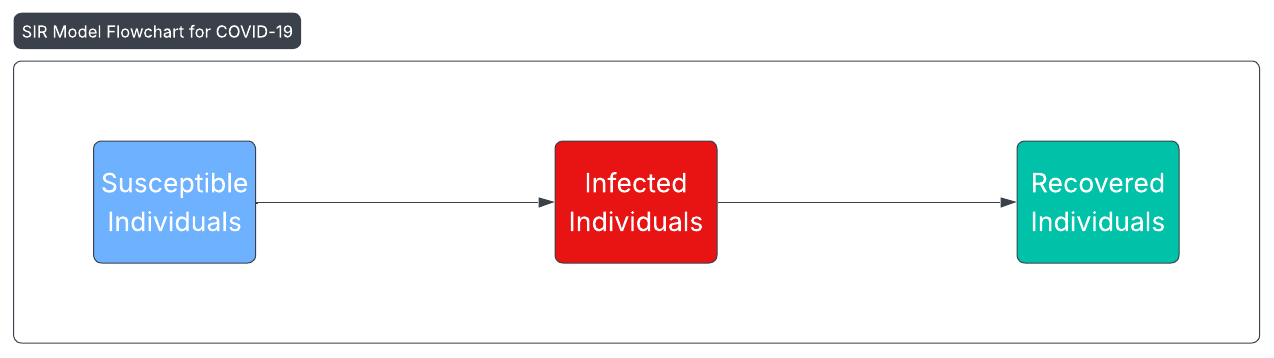

In [2]:
from IPython.display import display,HTML
from PIL import Image
# Show SIR flowchart
with Image.open('assets/Figs/SIRFlowChart.png') as i:
	display(i)

# Writing down the mathematical model
### The S-equation:
The susceptibles have only one arrow comming out of their compartment, this means the compartment is losing population and the rate of change of the $S$ population with time will be negative. The susceptible individuals who get infected move to the infected compartment. The rate at which susceptible population $S$ get infected by infected population $I$ is proportional to the number of **potentially infectious contacts** $S\times I$. Potentially because not all infectious contacts leads to transmission, only a fraction per unit time $\beta$ would. Thus, $\beta S I$ would be the number of transmissions (new infections) per unit time. Transmission of infection makes individuals move from the $S$ to the $I$ compartment. **Notice** that we did not incorporate birth of new $S$ individuals, had we done that an arrow would be entering the $S$ compartment. ($\beta$ = number of new infections per contact per unit time)

$\frac{dS}{dt} = -\beta S I$

### The I-equation
We now know that the arrow going to the $I$ compartment represent the flux of new infecteds $-\beta S I$ what about the flux out of the $I$ compartment?
Obviously this would represent the flux of the recovered from infection (those who become immune), let us assume that the average duration of infection (and infectiousness) is $\tau$ ($\tau \ne 0$) then the rate of recovery would be $\frac{1}{\tau}$

$\frac{dI}{dt} = +\beta SI - \frac{1}{\tau} I$

### The R-equation
Now the $R$ compartment only have one arrow coming into it which is the flux of individuals out of the $I$ compartment:

$\frac{dR}{dt} = +\frac{1}{\tau} I$

### Fixed population size
Sum the above equations:

$\frac{d(S+I+R)}{dt} \equiv \frac{dN}{dt} = 0$

Which highlights our assumtion that

$N = S + I + R = constant$

### Question: 
How the flowchart would change if birth and death from both natrual causes as well as excessive death from COVID-19 are all incorporated? Can you write the equations according to these changes? How does the rate of change $\frac{dN}{dt}$ look like with these additions? Does that make sense? (Hint: make the rate of natrual birth and death equal to $\mu$, and notice that $\mu N$ would represent the number of susceptible population born per unit time)

# The model 
The three interdependent differential equations are called system of differential equations:

$\frac{dS}{dt} = -\beta S I$

$\frac{dI}{dt} = +\beta S I - \frac{1}{\tau} I$

$\frac{dR}{dt} = +\frac{1}{\tau} I$

## The basic reproduction number

One interesting question is what condition should be satisfied at the start of an epidemic such that we do not have new infections that is what condition to make $\frac{dI}{dt}<0$

Remember at $t_0$ $S = S_0 \sim N$, $I_0 = 1$, $R_0 = 0$, let us focus on the infectious equation:

$\frac{dI}{dt} = \beta S_0-\frac{1}{\tau}$

This indicates that the initial value $\frac{dI}{dt}$ will be 
 1. positive (growing new infections) iff: $\beta \tau S_0 > 1$
 2. negative (decaying new infections) iff: $\beta \tau S_0 < 1$


The quantity deciding the fate of the epidemic is called the basic reporiduction number or $\mathbb{R_0}$ (please do not confuse it with the recovered at time zero!). 

Basic reprodcution number $\equiv \mathbb{R_0} = \beta \tau S_0$

It is defined as the number of secondary infections that one infectious individual would generate within the duration of infection. If you think about it $\beta S_0$ is the number of new infections per unit time by 1 infectious individual at the start of the epidemic (Hint $1\times S_0$ = number of infectious contacts). Thus, $\beta S_0\times\tau$ = number of new infections by an infectious individual during the course of infection.

## Interventions based on the mathematical model
The fate of the epidemic for a given population with initially $S_0$ uninfected individuals is dependent on $\tau$, $\beta$ and $S_0$. The higher one or more of these parameters the more likely an outbreak will take off. Conversely, the lower these parameters, the less likely an outbreak will take off (desirable). 
So strategies of intervening to break transmission usually focus on:
1. reducing $\beta$ and/or
2. reducing $\tau$ and or
3. reducing $S_0$

#### Questions: 

Q1. Imagine that at the start the entire population get vaccinated with 100% effcacious vaccine what would this do to $S_0$?

Q2. If an infection started in a population with a fraction $f$ of the population is vaccinated by 100% protective vaccine, what would be the basic reproduction number in this case? (Hint the infectious contacts for the infected individual = $1\times(1-f)S0$)

Q3. What would be the effect of lock downs?

Q4. What startegy would you suggest to decrease $\beta$? (Hint: think for example what infected and uninfected individuals should do to reduce the probability of transmission in a contact)

Q5. Can any intervention alter the duration of infectiousness $\tau$? What is it and how it does that?


# Solving the mathematical model

* By solving the mathematical model we mean solving for the three state variables $S(t)$ $I(t)$ $R(t)$ for any given values for model parameters: $\beta$, $\tau$.
* First we need to define the time variable. What do we choose of the unit time? (seconds, minutes, hours, days, weeks, months, ...etc).
* You want the unit time to be as small as possible but also you want to have it large enough for observable changes.
* For a disease such as COVID-19, a unit time of **days** would be good.
* To solve, we are going to use odeint (ODE integration) from the python package **SCIPY**, which takes a function defining the instantaneous rate of change for the system of differential equations, array of time to integrate over and model paramters. 

In [1]:
# Setting up things by importing necessary modules
%matplotlib widget
import numpy as np
import matplotlib.pyplot as pl
from ipywidgets import interactive, FloatSlider
import seaborn as sbs
sbs.set()
sbs.set_context('notebook')
# Setting up the time span covered by the model
years = 2
max_time_days = years*12*30
number_intervals = max_time_days
tt = np.linspace(0, max_time_days, number_intervals)
print(len(tt), max_time_days)

720 720


In [13]:
from scipy.integrate import odeint
# First we define the instantaneous rate of change
def dStatedt(y, t, beta, tau):
    """
       Function defining the rate of change of
       state variables: S, I, R at time t
       Args:
         y --> array of size 1x3 defining the values at t
         t --> time at which to calculate the rate of change
         beta, tau, .. --> model paramters
       Output: tuple (dS/dt, dI/dt, dR/dt) at t
    """
    # y is a numpy array/list with S=y[0], I=y[1], R=y[3]
    S, I, R = y
    dS_dt = -beta * S * I
    # Notice we are writing this for computers, we need to make sure 
    # no division by zero is encountered.
    if tau <= 1e-12:
        tau = 1E-5
    dI_dt = beta * S * I - 1/tau * I
    dR_dt = 1/tau * I
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
N = 10000  # Total population
I0 = 1    # Initial infected
R0 = 0    # Initial recovered
S0 = N - I0 - R0 # Initial susceptible

beta = 0.00003  # Infection rate
tau = 14 # Duration of infection in days

# Solve using scipy odeint!
y0 = [S0, I0, R0]
State_t = odeint(dStatedt, y0, tt, args=(beta, tau))
# State_t is a numpy array with number of columns = len(y0) and number of rows = len(tt)
print(State_t.shape)
S_t = State_t[:, 0]
I_t = State_t[:, 1]
R_t = State_t[:, 2]

(720, 3)


In [14]:
# Plot
fig, ax = pl.subplots()
ax.plot(tt, S_t, label='S', color='b')
ax.plot(tt, I_t, label='I', color='r')
ax.plot(tt, R_t, label='R', color='g')
ax.legend()
ax.set_xlim(-3,700)
fig.tight_layout()

## Let us play around with the parameters and look at the solution
Try to change the values of $\beta$ and $\tau$ and observe the change in the solution. To make this feasible, I have created the following sliders to facilitate this task.

In [15]:
# Define the model
def SIR_model(tt, y0, beta, tau):
    State_t = odeint(dStatedt, y0, tt, args=(beta, tau))
    # State_t is a numpy array with number of columns = len(y0) and number of rows = len(tt)
    return State_t
    

# Create the interactive plot
def plot_sir(beta, tau):
    tt = np.linspace(0, max_time_days, number_intervals)
    R0 = 0    # Initial recovered
    S0 = N - I0 - R0 # Initial susceptible
    y0 = [S0, I0, R0]
    State_t = SIR_model(tt, y0, beta, tau)
    S_t = State_t[:, 0]
    I_t = State_t[:, 1]
    R_t = State_t[:, 2]
    pl.figure(figsize=(7,5))
    pl.plot(tt, S_t, label='S', color='b')
    pl.plot(tt, I_t, label='I', color='r')
    pl.plot(tt, R_t, label='R', color='g')
    pl.title('Interactive SIR model')
    pl.xlabel('Time (days)')
    pl.ylabel('Number of individuals')
    pl.xlim(-3,800)
    pl.grid(True, linestyle='--', alpha=0.7)
    pl.axhline(0, color='black', linewidth=0.5)
    pl.axvline(0, color='black', linewidth=0.5)
    pl.legend()
    pl.show()
    
    
# Create sliders for beta and tau
beta_slider = FloatSlider(value=1e-6, min=1e-6, max=1e-4, step=1e-6, readout_format='0.4s', description='beta:')
tau_slider = FloatSlider(value=21, min=1, max=90, step=1, description='tau:')


# Generate the interactive widget
interactive_plot = interactive(plot_sir, beta=beta_slider, tau=tau_slider) 
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1e-06, description='beta:', max=0.0001, min=1e-06, readout_format='0.4…

#### Questions:

Q1. Leave $\tau=21$, what happens when you set $\beta$ to $1 \micro = 10^{-6}$, do we have an epidemic? Why and Why not? What is $\mathbb{R_0}$?

Q2. Leave $\tau=21$, increase $\beta$ slowly until you get an epidemic, what is $\mathbb{R_0}$ now?

Q3. What is the maximum number of infected individuals in the scenario in Q2?


# Applying the model to COVID-19 in Zalatola
* Now we are equibed with a solved mathematical model that we can fit to the case of Zalatola. We need first to plot the data points along with the model. Remember we have the following data points:


| days after 9/12/2020 | number of infected |
|------|--------------------|
| 20   |   105               |
| 30   |   796              |
| 40   |   3385             |

* If we consider the calendar time 9/12/2020 as the 0-time on the time axis (x-axis), then:

In [19]:
# Define the model
def SIR_model(tt, y0, beta, tau):
    State_t = odeint(dStatedt, y0, tt, args=(beta, tau))
    # State_t is a numpy array with number of columns = len(y0) and number of rows = len(tt)
    return State_t
    

# Create the interactive plot
def plot_sir(beta, tau):
    tt = np.linspace(0, max_time_days, number_intervals)
    R0 = 0    # Initial recovered
    S0 = N - I0 - R0 # Initial susceptible
    y0 = [S0, I0, R0]
    State_t = SIR_model(tt, y0, beta, tau)
    S_t = State_t[:, 0]
    I_t = State_t[:, 1]
    R_t = State_t[:, 2]
    pl.figure(figsize=(7,5))
    pl.plot([20,30,40],[105,796,3385], marker='*', markersize=18, linewidth=0, color='g', label='Data')
    pl.plot(tt, S_t, label='S', color='b')
    pl.plot(tt, I_t, label='I', color='r')
    pl.plot(tt, R_t, label='R', color='g')
    pl.title('Interactive SIR model')
    pl.xlabel('Time (days)')
    pl.ylabel('Number of individuals')
    pl.xlim(-3,120)
    pl.ylim(0,5000)
    pl.grid(True, linestyle='--', alpha=0.7)
    pl.axhline(0, color='black', linewidth=0.5)
    pl.axvline(0, color='black', linewidth=0.5)
    pl.legend()
    pl.show()
    
    
# Create sliders for beta and tau
beta_slider = FloatSlider(value=1e-6, min=1e-6, max=1e-4, step=1e-6, readout_format='0.4s', description='beta:')
tau_slider = FloatSlider(value=21, min=1, max=90, step=1, description='tau:')


# Generate the interactive widget
interactive_plot = interactive(plot_sir, beta=beta_slider, tau=tau_slider) 
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1e-06, description='beta:', max=0.0001, min=1e-06, readout_format='0.4…

#### Questions

Q1. Start with the lowest $\tau$ in the slider and change $\beta$, is there a value of $\beta$ that makes the red curve pass through the three green data points?

Q2. Increase $\tau$ to 12 and try again, can you find a fit to the data points? If so recorded in the table below and fill in the rest for this row of parameter values.

Q3. Start over, move $\tau$ to 13, 14 15, ...,21 days and slowly increase $\beta$ in each case to get a fit. Record each of your findings again in the table below.

Q4. Why there are multiple values for $\beta$ and $\tau$ that can fit the given data? (essentially each of the epidemics in the table have the same initial growth in the number of infections that the data points represent, this highlights the need to include uncertainity in model fetting so that we do not have a single point estimate to rely on for decision making).

Q5. If you were a policy maker in Zalatola, which maximum number of infected you think is plausible upon which to make decisions? 

#### Class split into 10 groups, each group works with one line from the table below.
Q6. POLICY-MAKER: Is there an outbreak in Zalatola (i.e. would COVID-19 spread in Zalatola)? If so how much is the expected maximum number of infections and how does the outbreak look like over time?
    
    YOU: (Hint: The bottom icon can save your plot)

Q7. POLICY-MAKER: Would the number of infected individuals ever exceed 3900? If so at what time?

    YOU: (Hint hover over the graph to get points)


| $\tau$  (days)| $\beta$ (new infections/day/contact) | $\mathbb{R_0}$ (new infections/index case)| maximum number infected | day maximum number infected reached |
|------|----------------|---------------|-----------------------|----------------------------------|
| 12   |                |               |                       |                                  |
| 13   |                |               |                       |                                  |
| 14   |                |               |                       |                                  |
| 15   |                |               |                       |                                  |
| 16   |                |               |                       |                                  |
| 17   |                |               |                       |                                  |
| 18   |                |               |                       |                                  |
| 19   |                |               |                       |                                  |
| 20   |                |               |                       |                                  |
| 21   |                |               |                       |                                  |

## Intervention against COVID-19 in Zalatola

Obviously we have several scenarios that fit our data with alarming maximum number of infections. Now that we know things are going in the wrong direction, how do we alter that direction? This is called intervention. Interventions can be:
1. Pharmaceutical: providing a drug. And can be:
    A. Therapeutical: drug is provided to infected individuals ($I$ individuals) to minimize the likelihood of hospitalization.
    B. Preventive: drug is provided to unifected individuals ($S$ individuals) to minimize the likelihood of infection.
2. Non-pharmaceutical: strategies that aims to reduce infectious contacts=$S\times I$ or the fraction of infectious contacts that leads to transmission $\beta$ at least for some duration of time.

#### Question
Classify each of the following interventions to the one of the above categories and describe its impact: Vaccines, Lockdown, Quarantine of exposed or infected individuals, Stay at home when sick policy, a drug that alleviates the symptoms of COVID-19. 

Now we turn to the question by the policy-maker:
POLICY-MAKER: would a 10 day lockdown starting on day 40 bring the maximum number of infected below 3900?
To simulate, the impact of this lockdown, we set $\beta$ (fraction of infectious contacts that lead to transmission) to decrease by 95% for 10 days starting from day 40

$$
\beta(t) = \begin{cases} 
    \beta_0 & \text{if } t <40 \ \ \text{or } t>=50 \\
     0.05\times \beta_0 & \text{if } 40 \le t \le 49
\end{cases}
$$

In [17]:
# First we define the instantaneous rate of change
def dStatedt2(y, t, beta, tau):
    """
       Function defining the rate of change of
       state variables: S, I, R at time t
       Args:
         y --> array of size 1x3 defining the values at t
         t --> time at which to calculate the rate of change
         beta, tau, .. --> model paramters
       Output: tuple (dS/dt, dI/dt, dR/dt) at t
    """
    # y is a numpy array/list with S=y[0], I=y[1], R=y[3]
    S, I, R = y
    # beta is now beta_0
    beta_t = beta if (t<40 or t>=50) else 0.05*beta
    dS_dt = -beta_t * S * I
    # Notice we are writing this for computers, we need to make sure 
    # no division by zero is encountered.
    if tau <= 1e-12:
        tau = 1E-5
    dI_dt = beta_t * S * I - 1/tau * I
    dR_dt = 1/tau * I
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
N = 10000  # Total population
I0 = 1    # Initial infected
R0 = 0    # Initial recovered
S0 = N - I0 - R0 # Initial susceptible


In [18]:
# Define the model
def SIR_model(tt, y0, beta, tau):
    State_t = odeint(dStatedt2, y0, tt, args=(beta, tau))
    # State_t is a numpy array with number of columns = len(y0) and number of rows = len(tt)
    return State_t
    

# Create the interactive plot
def plot_sir(beta, tau):
    tt = np.linspace(0, max_time_days, number_intervals)
    R0 = 0    # Initial recovered
    S0 = N - I0 - R0 # Initial susceptible
    y0 = [S0, I0, R0]
    State_t = SIR_model(tt, y0, beta, tau)
    S_t = State_t[:, 0]
    I_t = State_t[:, 1]
    R_t = State_t[:, 2]
    pl.figure(figsize=(7,5))
    pl.plot([20,30,40],[105,796,3385], marker='*', markersize=18, linewidth=0, color='g', label='Data')
    pl.plot(tt, S_t, label='S', color='b')
    pl.plot(tt, I_t, label='I', color='r')
    pl.plot(tt, R_t, label='R', color='g')
    pl.title('Interactive SIR model')
    pl.xlabel('Time (days)')
    pl.ylabel('Number of individuals')
    pl.xlim(-3,120)
    pl.ylim(0,5000)
    pl.grid(True, linestyle='--', alpha=0.7)
    pl.axhline(0, color='black', linewidth=0.5)
    pl.axvline(0, color='black', linewidth=0.5)
    pl.legend()
    pl.show()
    
    
# Create sliders for beta and tau
beta_slider = FloatSlider(value=1e-6, min=1e-6, max=1e-4, step=1e-6, readout_format='0.4s', description='beta:')
tau_slider = FloatSlider(value=21, min=1, max=90, step=1, description='tau:')


# Generate the interactive widget
interactive_plot = interactive(plot_sir, beta=beta_slider, tau=tau_slider) 
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1e-06, description='beta:', max=0.0001, min=1e-06, readout_format='0.4…

#### Questions
What can you answer the POLICY-MAKER, is it possible to lower the maximum number of infections with their suggested intervention?

YOU:

## Outbreak in 50% vaccinated Zalaolans
Now we study the outbreak in Zalatola if 50% of the population were vaccinated by a fully protective vaccine with life-long protection (Excellent vaccine!). Remeber that when the outbreak happens in population with a fraction $f$ that is vaccinated, the infectious contacts for one infected individual would be: 

$$1\times(1-f)S0$$

and during their infection duration $\tau$ the total number of secondary infections from this single case (basic reproduction number) would be:

$$\mathbb{R_0} =  \beta(1-f)S0 \tau$$

So when $f=0.5$ that means \mathbb{R_0} is halved!

But how do simulate an outbreak with this scenario? Well we would have the same outbreak but now only $(1-f)S$ can be infected at any time (i.e. are susceptible), alternatively we can just replace $\beta SI$ by $(1-f)\beta SI$

In [25]:
# First we define the instantaneous rate of change
def dStatedt3(y, t, beta, tau, fv):
    """
       Function defining the rate of change of
       state variables: S, I, R at time t
       Args:
         y --> array of size 1x3 defining the values at t
         t --> time at which to calculate the rate of change
         beta, tau, .. --> model paramters
       Output: tuple (dS/dt, dI/dt, dR/dt) at t
    """
    # y is a numpy array/list with S=y[0], I=y[1], R=y[3]
    S, I, R = y
    # beta is now beta_0
    assert 0 <= fv <= 1, f"{fv} must be between 0 and 1"
    beta_t = (1.0 - fv)*beta
    dS_dt = -beta_t * S * I
    # Notice we are writing this for computers, we need to make sure 
    # no division by zero is encountered.
    if tau <= 1e-12:
        tau = 1E-5
    dI_dt = beta_t * S * I - 1/tau * I
    dR_dt = 1/tau * I
    return [dS_dt, dI_dt, dR_dt]

# Initial conditions
N = 10000  # Total population
I0 = 1    # Initial infected
R0 = 0    # Initial recovered
S0 = N - I0 - R0 # Initial susceptible

In [31]:
# Define the model
def SIR_model(tt, y0, beta, tau, fv):
    State_t = odeint(dStatedt3, y0, tt, args=(beta, tau, fv))
    # State_t is a numpy array with number of columns = len(y0) and number of rows = len(tt)
    return State_t
    

# Create the interactive plot
def plot_sir(beta, tau, fv):
    tt = np.linspace(0, max_time_days, number_intervals)
    R0 = 0    # Initial recovered
    S0 = N - I0 - R0 # Initial susceptible
    y0 = [S0, I0, R0]
    State_t = SIR_model(tt, y0, beta, tau, fv)
    S_t = State_t[:, 0]
    I_t = State_t[:, 1]
    R_t = State_t[:, 2]
    pl.figure(figsize=(7,5))
    pl.plot([20,30,40],[105,796,3385], marker='*', markersize=18, linewidth=0, color='g', label='Data')
    pl.plot(tt, S_t, label='S', color='b')
    pl.plot(tt, I_t, label='I', color='r')
    pl.plot(tt, R_t, label='R', color='g')
    pl.title('Interactive SIR model')
    pl.xlabel('Time (days)')
    pl.ylabel('Number of individuals')
    pl.xlim(-5,800)
    pl.ylim(-5,11000)
    pl.grid(True, linestyle='--', alpha=0.7)
    pl.axhline(0, color='black', linewidth=0.5)
    pl.axvline(0, color='black', linewidth=0.5)
    pl.legend()
    pl.show()
    
    
# Create sliders for beta and tau
beta_slider = FloatSlider(value=1e-6, min=1e-6, max=1e-4, step=1e-6, readout_format='0.4s', description='beta:')
tau_slider = FloatSlider(value=21, min=1, max=90, step=1, description='tau:')
fv_slider = FloatSlider(value=0.5, min=0, max=0.999, step=0.1, description='fv:')


# Generate the interactive widget
interactive_plot = interactive(plot_sir, beta=beta_slider, tau=tau_slider, fv=fv_slider) 
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1e-06, description='beta:', max=0.0001, min=1e-06, readout_format='0.4…

#### Qustions

Q1. POLICY-MAKER: What is the maximum number of infected individuals if a fully effective vaccine was available and 50% of Zalatola population were vaccinated before Septemebr 12,2020?

YOU: